In [14]:
#install.packages('dslabs')
#install.packages('ggplot2')
install.packages('purrr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
#library(dslabs)
#library(ggplot2)
library(purrr)

In [5]:
data("tissue_gene_expression")
dim(tissue_gene_expression$x)

[1] 189 500

In [7]:
pca <- prcomp(tissue_gene_expression$x)
summary(pca)

Importance of components:
                          PC1    PC2   PC3     PC4     PC5     PC6     PC7
Standard deviation     8.8922 5.6936 4.921 3.76975 3.43988 3.14760 2.81773
Proportion of Variance 0.3362 0.1378 0.103 0.06042 0.05031 0.04213 0.03376
Cumulative Proportion  0.3362 0.4740 0.577 0.63745 0.68776 0.72989 0.76365
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.1850 1.97644 1.87249 1.65667 1.52480 1.47054 1.27826
Proportion of Variance 0.0203 0.01661 0.01491 0.01167 0.00989 0.00919 0.00695
Cumulative Proportion  0.7840 0.80056 0.81547 0.82714 0.83702 0.84622 0.85316
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     1.20327 1.18697 1.13891 1.08142 1.03650 0.9815 0.97302
Proportion of Variance 0.00616 0.00599 0.00552 0.00497 0.00457 0.0041 0.00403
Cumulative Proportion  0.85932 0.86531 0.87083 0.87580 0.88037 0.8845 0.88849
                          PC22    PC23    PC24    

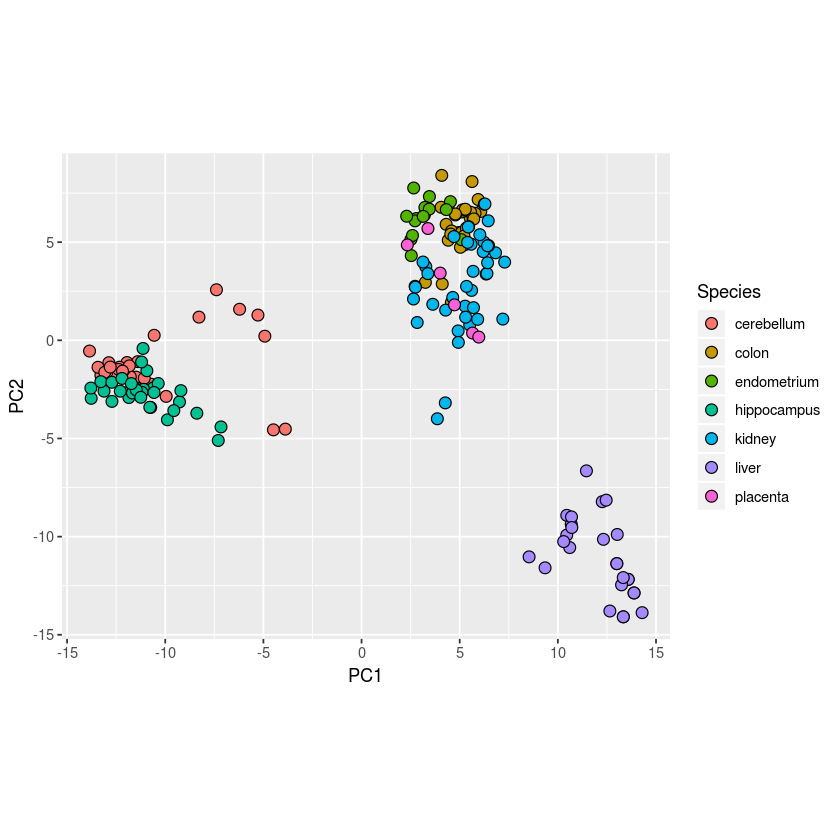

In [19]:
data.frame(pca$x[,1:2], Species=tissue_gene_expression$y) %>% 
  ggplot(aes(PC1,PC2, fill = Species))+
  geom_point(cex=3, pch=21) +
  coord_fixed(ratio = 1)

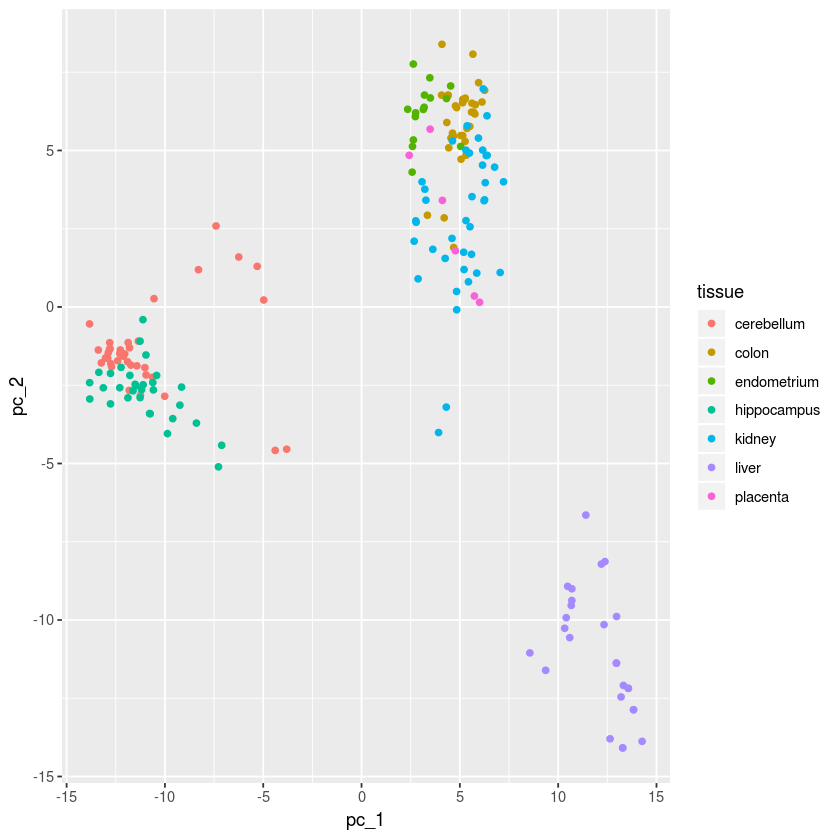

In [23]:
x <- with(tissue_gene_expression, sweep(x, 1, rowMeans(x)))
pc <- prcomp(x)
data.frame(pc_1 = pc$x[,1], pc_2 = pc$x[,2], 
			tissue = tissue_gene_expression$y) %>%
	ggplot(aes(pc_1, pc_2, color = tissue)) +
	geom_point()